In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [20]:
training_set = pd.read_csv("Google_Stock_Price_Train.csv")


In [21]:
training_set = training_set.iloc[:,1:2].values


In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)


In [23]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]


In [24]:
X_train 

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95163331],
       [0.95725128],
       [0.93796041]])

In [18]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [8]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 300)

Epoch 1/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9835
Epoch 2/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7845
Epoch 3/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6277
Epoch 4/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4782
Epoch 5/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3757
Epoch 6/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2999
Epoch 7/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2507
Epoch 8/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1913
Epoch 9/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1487
Epoch 10/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1179
Epoch 11/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1024
Epoch 12/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0901
Epoch 13/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0764
Epoch 14/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0711
Epoch 15/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0671
Epoc

In [9]:
test_set = pd.read_csv('Google_Stock_Price_Test (1).csv')
real_stock_price = test_set.iloc[:,1:2].values


In [10]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


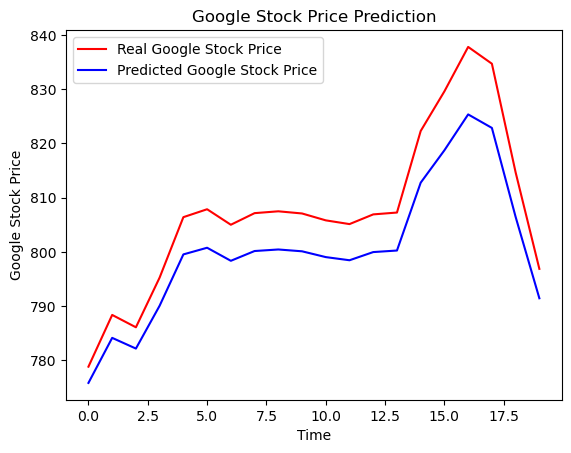

In [11]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [12]:
real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

In [13]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


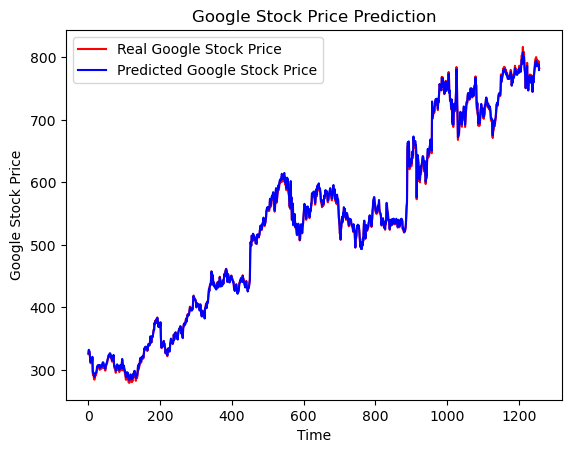

In [14]:
plt.plot(real_stock_price_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [15]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))


In [16]:
rmse


7.576121647069731